## Movie_Review Sentimental Analysis

I used a dataset from the IMDB_Dataset
This dataset is already located in my the folder for this project.

The file we are using contains a collection of nearly 2 thousands movie review comment. 




In [1]:
messages = [line.rstrip() for line in open('movie_review.csv')]
print(len(messages))

1959


A collection of texts is also sometimes called "corpus". Let's print the first ten messages 

In [2]:
for message_no, message in enumerate(messages[:4]):
    print(message_no, message)
    print('\n')

0 ﻿"This movie is really not all that bad. But then again, this movie genre is right down my alley. Sure, the sets are cheap, but they really did decent with what they had. <br /><br />If you like cheap, futuristic, post-apocalyptic B movies, then you'll love this one!! I sure did!<br /><br />",positive


1 "Vanilla Sky was a wonderfully thought out movie. Or rather, ""Abre Los Ojos"" was well thought out. I watched that movie late one night, excited about what was to come. I wasn't disappointed. By the end of the movie, I was awstruck. I couldn't get it off my mind. The whole idea of it just blew me away. The ending, was more of a surprise than Shyamalan could ever do. The plot line was also something that kept me interesting through and through. The cast, superb. It was an all around wonderful movie. The kind of movie you can watch again and again and always find something new. I've seen it four or five times and I'm always finding something new. It's a movie to keep you interested f

Due to the spacing we can tell that this is a [CSV](http://en.wikipedia.org/wiki/Comma-separated_values) ("Comma separated values") file.

Using Pandas

In [4]:
import pandas as pd

We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

In [8]:
messages = pd.read_csv('movie_review.csv', sep=',',names=["message", "label"])
messages.head()

,message,label
0,This movie is really not all that bad. But the...,positive
1,Vanilla Sky was a wonderfully thought out movi...,positive
2,Joseph Brady and Clarence Doolittle are two sa...,positive
3,10 ITEMS OR LESS was made in two weeks on a sh...,positive
4,I saw this movie first on the Berlin Film Fest...,positive


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [9]:
messages.describe()

,message,label
count,1959,1959
unique,1959,2
top,This has the absolute worst performance from R...,negative
freq,1,1001


by using **groupby** and describe by label, this way we can begin to think about the features that separate positive and negative!

In [10]:
messages.groupby('label').describe()

message
label                                                             
negative count                                                1001
         unique                                               1001
         top     This has the absolute worst performance from R...
         freq                                                    1
positive count                                                 958
         unique                                                958
         top     I did not have too much interest in watching T...
         freq                                                    1

As we continue our analysis we want to start thinking about the features we are going to be using. 
This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). 
The better our domain knowledge on the data will have, the better our ability to engineer more features from it. 


Let's make a new column to detect how long the text messages are:

In [11]:
messages['length'] = messages['message'].apply(len)
messages.head()

,message,label,length
0,This movie is really not all that bad. But the...,positive,290
1,Vanilla Sky was a wonderfully thought out movi...,positive,695
2,Joseph Brady and Clarence Doolittle are two sa...,positive,2171
3,10 ITEMS OR LESS was made in two weeks on a sh...,positive,1686
4,I saw this movie first on the Berlin Film Fest...,positive,477


### Data Visualization
Let's visualize this! Let's do the imports:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

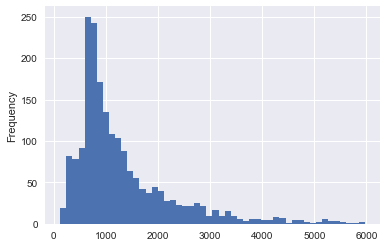

In [14]:
messages['length'].plot(bins=50, kind='hist') 

 the x-axis goes all the way to 6000ish, this must mean that there is some really long message!

In [15]:
messages.length.describe()

count    1959.000000
mean     1310.167432
std       960.743424
min       123.000000
25%       694.000000
50%       974.000000
75%      1609.500000
max      5966.000000
Name: length, dtype: float64

 max length of the message = 5966 characters, 

In [17]:
messages[messages['length'] == 5966]['message'].iloc[0]

'In NYC, seaman Michael O\'Hara (Orson Welles) rescues Elsa Bannister (Rita Hayworth) from a mugging & rape as she takes a horse & carriage through Central Park -and lives to regret it. Titian-haired Hayworth\'s a platinum blonde in this one; as dazzling as fresh-fallen snow -but nowhere near as pure...<br /><br />To reveal any more of the convoluted plot in this seminal "noir" would be criminal. It\'s as deceptive as the mirrors used to cataclysmic effect in the final scenes -but the film holds far darker secrets: From the NY Times: "Childhood Shadows: The Hidden Story Of The Black Dahlia Murder" by Mary Pacios "Mary Pacios, who was 5 years old when she was befriended by 15 year old Bette Short, retraces Short\'s steps, interviewing friends and associates. She also offered a detailed, if speculative, analysis of Orson Welles -particularly in regard to his movie "The Lady From Shanghai". According to Ms. Pacios, the movie, along with related archival materials, has many of the same rit

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e67e518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e788908>], dtype=object)

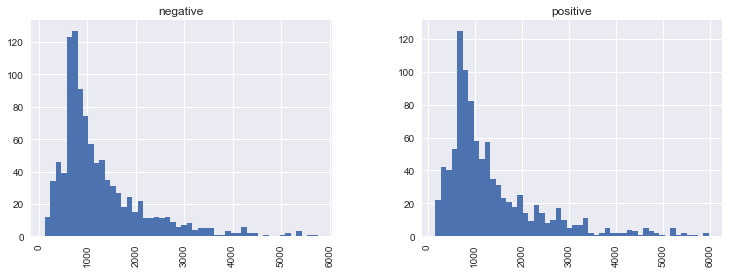

In [18]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

There is a trend that negative messages slightly tend to have more characters. 



## Text Pre-processing

In [19]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [20]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [21]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [22]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [24]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Here is the original DataFrame again:

In [25]:
messages.head()

,message,label,length
0,This movie is really not all that bad. But the...,positive,290
1,Vanilla Sky was a wonderfully thought out movi...,positive,695
2,Joseph Brady and Clarence Doolittle are two sa...,positive,2171
3,10 ITEMS OR LESS was made in two weeks on a sh...,positive,1686
4,I saw this movie first on the Berlin Film Fest...,positive,477


In [26]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [movie, really, bad, movie, genre, right, alle...
1    [Vanilla, Sky, wonderfully, thought, movie, ra...
2    [Joseph, Brady, Clarence, Doolittle, two, sail...
3    [10, ITEMS, LESS, made, two, weeks, shoestring...
4    [saw, movie, first, Berlin, Film, Festival, ne...
Name: message, dtype: object

In [27]:
# Show original dataframe
messages.head()

,message,label,length
0,This movie is really not all that bad. But the...,positive,290
1,Vanilla Sky was a wonderfully thought out movi...,positive,695
2,Joseph Brady and Clarence Doolittle are two sa...,positive,2171
3,10 ITEMS OR LESS was made in two weeks on a sh...,positive,1686
4,I saw this movie first on the Berlin Film Fest...,positive,477


### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand 

## Vectorization



Now I'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

I'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)



Each vector will have as many dimensions as there are unique words in the SMS corpus. I will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, I can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [29]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

34804


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [30]:
message4 = messages['message'][3]
print(message4)

10 ITEMS OR LESS was made in two weeks on a shoestring budget by writer/director Brad Silberling, just a little film shot in Carson, CA that feels like the entire story was improvised...in the best sense of the word. Silberling had the good fortune to pair veteran actor Morgan Freeman, in between his big projects, with Spanish actress Paz Vega, and the result is a dialogue between two people from different vantages who manage to enhance the life of the other.<br /><br />Morgan Freeman plays himself - yet part of the comedy is that he is depicted as an actor who has been out of work for four years, scouting a location for a little 'filler film' to get back into the flow of things. His 'role' is to be that of a market manager and he is dropped off at seedy market in Carson where he encounters, among others, one Scarlet, the girl at the argumentative 10 Items or Less checkout line. Not only is Scarlet tired of her static job, she is also generally angry about her philandering husband (Bob

Now let's see its vector representation:

In [31]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 8)	2
  (0, 972)	1
  (0, 1761)	1
  (0, 1880)	1
  (0, 2098)	1
  (0, 2263)	1
  (0, 2350)	2
  (0, 3209)	1
  (0, 3745)	1
  (0, 4558)	3
  (0, 4972)	1
  (0, 5294)	1
  (0, 5754)	1
  (0, 5945)	1
  (0, 6606)	1
  (0, 6844)	1
  (0, 7925)	2
  (0, 8793)	2
  (0, 10103)	2
  (0, 10104)	1
  (0, 10479)	2
  (0, 10733)	1
  (0, 11846)	1
  (0, 12624)	1
  (0, 12812)	2
  :	:
  (0, 30171)	1
  (0, 30353)	1
  (0, 31089)	1
  (0, 31242)	3
  (0, 32136)	1
  (0, 32308)	1
  (0, 32501)	1
  (0, 32541)	1
  (0, 32647)	1
  (0, 32876)	1
  (0, 33027)	3
  (0, 33651)	1
  (0, 33728)	1
  (0, 33771)	1
  (0, 33779)	1
  (0, 33940)	1
  (0, 34160)	1
  (0, 34188)	2
  (0, 34526)	1
  (0, 34533)	1
  (0, 34547)	1
  (0, 34582)	1
  (0, 34631)	1
  (0, 34690)	1
  (0, 34705)	1
(1, 34804)


In [33]:
print(bow_transformer.get_feature_names()[33027])
print(bow_transformer.get_feature_names()[34188])

two
well


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. 

In [34]:
messages_bow = bow_transformer.transform(messages['message'])

In [35]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1959, 34804)
Amount of Non-Zero occurences:  200194


In [36]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

using SciKit Learn I can do this:

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 34705)	0.0468524654743
  (0, 34690)	0.0394981342845
  (0, 34631)	0.0764044338673
  (0, 34582)	0.0459522512965
  (0, 34547)	0.0553258362323
  (0, 34533)	0.0396450257112
  (0, 34526)	0.0572158383226
  (0, 34188)	0.0644396523546
  (0, 34160)	0.0864247286076
  (0, 33940)	0.0902490414147
  (0, 33779)	0.0603214064231
  (0, 33771)	0.0600902086157
  (0, 33728)	0.0834583611387
  (0, 33651)	0.104853486557
  (0, 33027)	0.107573072349
  (0, 32876)	0.0684180232125
  (0, 32647)	0.0697710754138
  (0, 32541)	0.0570324762589
  (0, 32501)	0.0697710754138
  (0, 32308)	0.0411004586141
  (0, 32136)	0.0821913515605
  (0, 31242)	0.0879636762249
  (0, 31089)	0.0926727401135
  (0, 30353)	0.0834583611387
  (0, 30171)	0.051461542827
  :	:
  (0, 12812)	0.100410850258
  (0, 12624)	0.0688539159962
  (0, 11846)	0.0902490414147
  (0, 10733)	0.0789854543886
  (0, 10479)	0.209706973114
  (0, 10104)	0.104853486557
  (0, 10103)	0.191278215165
  (0, 8793)	0.185345480227
  (0, 7925)	0.159941223191
  (0, 6844)	0.09267

We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [38]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

6.50125821054
7.1944053911


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [39]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1959, 34804)


## Training a model

With messages represented as vectors, we can finally train our positive/negative classifier. Now we can actually use almost any sort of classification algorithms. For this project i will use (http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [40]:
from sklearn.naive_bayes import MultinomialNB
sentimental_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message and checking how we do:

In [41]:
print('predicted:', sentimental_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: positive
expected: positive




##  Model Evaluation
Now I want to determine how well our model will do overall on the entire dataset. 

In [42]:
all_predictions = sentimental_detect_model.predict(messages_tfidf)
print(all_predictions)

['negative' 'positive' 'positive' ..., 'negative' 'negative' 'negative']


I can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [43]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

   negative       0.96      1.00      0.98      1001
   positive       1.00      0.95      0.97       958

avg / total       0.98      0.98      0.98      1959



In the above "evaluation",we evaluated accuracy on the same data we used for training.

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1567 392 1959


The test size is 20% of the entire dataset (392 messages out of total 1959), and the training is the rest (1567 out of 1959).

## Creating a Data Pipeline

I will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow me to set up all the transformations that I will do to the data for future use. 

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now I can directly pass message text data and the pipeline will do our pre-processing for me! I can treat it as a model/estimator API:

In [46]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1103e9158>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
predictions = pipeline.predict(msg_test)

In [48]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

   negative       0.89      0.77      0.83       234
   positive       0.72      0.85      0.78       158

avg / total       0.82      0.81      0.81       392



Now I have a classification report for our model on a true testing set! 